<a href="https://colab.research.google.com/github/Saurabhbaghel/ocr-e-learning-workbooks/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing important libraries

In [ ]:
import os

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


In [ ]:
def show(img:np.ndarray, dict_params:dict[str, int]):
  title = str()
  for param in dict_params:
    title += f"{param}:{dict_params[param]}, " 
  plt.title(title)
  plt.imshow(img)

# Skewed Text

## Downloading a test image

In [ ]:
! wget https://i.stack.imgur.com/ouy3d.jpg

--2023-03-23 15:41:11--  https://i.stack.imgur.com/ouy3d.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 151.101.20.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|151.101.20.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82653 (81K) [image/jpeg]
Saving to: ‘ouy3d.jpg’

ouy3d.jpg           100%[===================>]  80.72K  --.-KB/s    in 0.008s  

2023-03-23 15:41:11 (9.53 MB/s) - ‘ouy3d.jpg’ saved [82653/82653]



In [ ]:
path = "/content/ouy3d.jpg"
img = cv.imread(path)

## Converting to Gray and inverting
### to make the processes easier

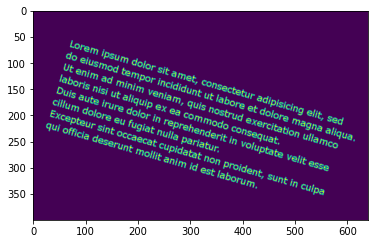

In [ ]:
# converting to gray
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# inverting 
invert = cv.bitwise_not(gray)
# plotting 
plt.imshow(invert)

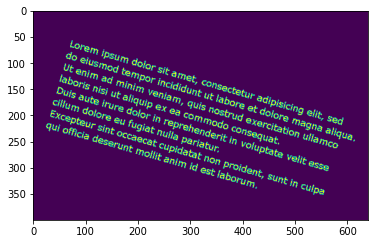

In [ ]:
thresh = cv.threshold(invert, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)[1]
plt.imshow(thresh)

In [ ]:
# Finding the points of interest, i.e. the points where the pixel value > 0
coords = np.column_stack(np.where(thresh > 0))

# Finding the bounding rectangle for those points
# the rectangle will contain all the points .
# there will exist many rectangles containing those points but
# only that recatangle is chosen which has the minimum area.
# therefore, the rectangle may be rotated. And we will use that angle of rotation 
point1, point2, angle = cv.minAreaRect(coords)

In [ ]:
# the angle at which the text is oriented
angle

74.53590393066406

In [ ]:
# the transformation angle in this case should be 
# 90 - angle. 
# Because opencv consider the angle between the edge closest to the horizontal and horizontal
# therefore the edge making the angle "angle" with the horiszontal needs to gain "90-angle"
# more to become vertical 
t_angle = 90-angle

In [ ]:
h, w = img.shape[:2]
center = (w // 2, h // 2)  # the geometrical center of the image
M = cv.getRotationMatrix2D(center, t_angle, 1.0)     # gives the affine matrix of 2D rotation   
rotated = cv.warpAffine(img, M, (w, h), flags=cv.INTER_CUBIC, borderMode=cv.BORDER_REPLICATE)  

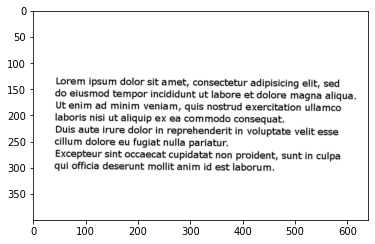

In [ ]:
plt.imshow(rotated)

In [ ]:
a
M

array([[ 2.66634473e-01, -9.63797727e-01,  4.27436514e+02],
       [ 9.63797727e-01,  2.66634473e-01, -1.61742167e+02]])

# Contrast and Brightness

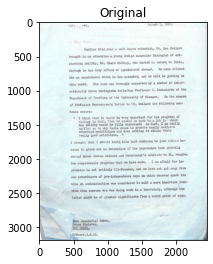

In [ ]:
# Reading Image
img_path = "/content/MS-001_1_1_1_9_P_0008.jpg"
img = cv.imread(img_path, cv.IMREAD_UNCHANGED)
plt.title("Original")
plt.imshow(img)

In [ ]:
# Brightness = 20, Contrast = 1.5
dict_params = {"brightness" : 20, "contrast": 1.5}

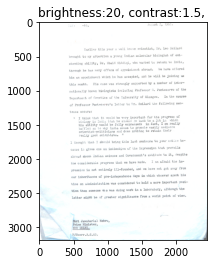

In [ ]:
img_changed = cv.addWeighted(img, contrast, np.zeros(img.shape, img.dtype), 0, brightness)
show(img_changed, dict_params)

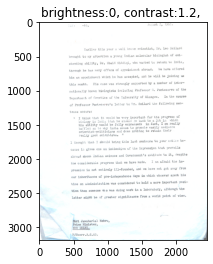

In [ ]:
# experiment with contrast and brightness value
dict_params = {"brightness" : 0, "contrast" : 1.2}
img_contrast = cv.addWeighted(img, contrast, np.zeros(img.shape, img.dtype), 0, brightness)
plt.title(f"Contrast: {contrast}, Brightness: {brightness}")
show(img_contrast, dict_params)

## Sharpening Image

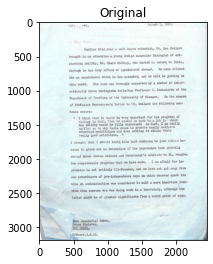

In [ ]:
# Reading Image
img_path = "/content/MS-001_1_1_1_9_P_0008.jpg"
img = cv.imread(img_path, cv.IMREAD_UNCHANGED)
plt.title("Original")
plt.imshow(img)

In [ ]:
# we need a sharpening kernel
kernel = np.array([
    [0, -1.1, 0],
    [-1.1, 5.005, -1.1],
    [0, -1.1, 0]
])

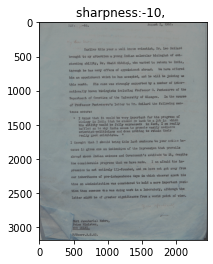

In [ ]:
image_sharp = cv.filter2D(img, -1, kernel)
show(image_sharp, {"sharpness": -10})